In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/MLprojects/prediction-of-credit-card-fraud-using-machine-learning/data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Analysis


### Null values Checking:

In [6]:
print("total null values:",df.isnull().sum().max())

total null values: 0


In [7]:
#creditcard.csv has zero null values

### legal and illegal transaction count

Class
0    284315
1       492
Name: count, dtype: int64


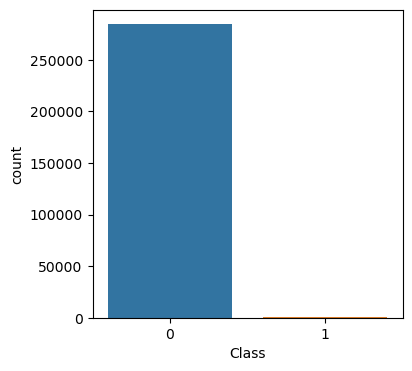

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x='Class',data=df,ax=ax);
print(pd.Series(df.Class).value_counts())
plt.show()

In [9]:
#There’s a considerable discrepancy between the legal [0] transactions and illegal [1] occurrences.
#Due to this, the dataset will be balanced before the setup of the machine learning model.

### Checking Outliers in ‘Amount’ values

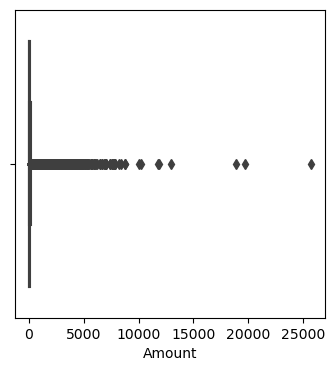

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='Amount', data=df,ax=ax)
plt.show()

In [11]:
#As we can see in the previous image, there’s a lot of outliers in the Amount column,
#we will perform a cleaning of these values and redo the plot

##### checking outlier values 

In [12]:
# IQR
q1_amount = df.Amount.quantile(.25)
q3_amount = df.Amount.quantile(.75)
IQR_amount = q3_amount - q1_amount
print('IQR: ', IQR_amount)

IQR:  71.565


In [13]:
# defining limits                                       
sup_amount = q3_amount + 1.5 * IQR_amount
inf_amount = q1_amount - 1.5 * IQR_amount
print('Upper limit: ', sup_amount)
print('Lower limit: ', inf_amount)

Upper limit:  184.5125
Lower limit:  -101.7475


In [14]:
# cleaning the outliers in `Amount` values
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Amount>184.49].index, axis=0, inplace=True)

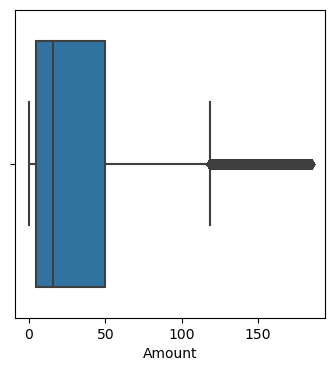

In [15]:
# new boxplot for `Amount` values after handling outliers
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='Amount', data=df_clean,ax=ax)
plt.show()


In [16]:
#After cleaning the outliers, the values in the Amount column are less discrepant and the boxplot easier to read.

### Transactions Histograms

#### legal transactions by time

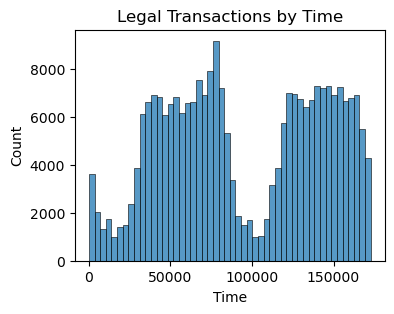

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(x=(df_clean.Time[df_clean.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()

#### legal transactions by amount

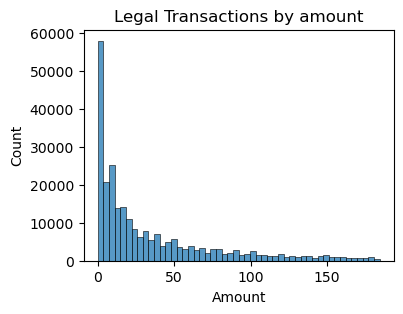

In [18]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(x=(df_clean.Amount[df_clean.Class==0]), bins=50)
ax.set_title('Legal Transactions by amount')
plt.show()

#### illegal transactions by time

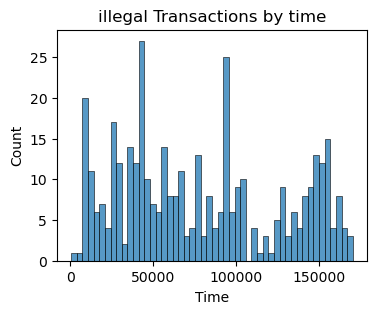

In [19]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(x=(df_clean.Time[df_clean.Class==1]), bins=50)
ax.set_title('illegal Transactions by time')
plt.show()

#### illegal transactions by amount

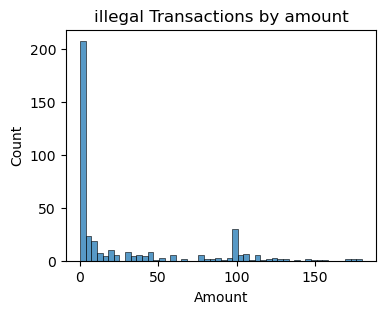

In [20]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(x=(df_clean.Amount[df_clean.Class==1]), bins=50)
ax.set_title('illegal Transactions by amount')
plt.show()

# Pre-Processing Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

In [22]:
# creating a copy of the original dataset
df_new = df_clean.copy()
# standardize data
scaler = StandardScaler()
df_new['Amount'] = scaler.fit_transform(df_new.Amount.values.reshape(-1, 1))
df_new['Time'] = scaler.fit_transform(df_new.Time.values.reshape(-1, 1))
# check the standardized data
df_new.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.995712,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.719341,0
1,-1.995712,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.765588,0
3,-1.995691,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.099819,0
4,-1.995670,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.830653,0
5,-1.995670,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.742344,0


In [23]:
# train and test data
X = df_new.drop('Class', axis=1)
y = df_new['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)


# Balancing dataset

In [24]:
#As we can see in the exploratory analysis, we have a discrepancy between the number of legal transactions and frauds.
#To feed the machine learning model without any bias. We will perform the balance of the dataset to keep the values as close as possible.

In [25]:
from imblearn.under_sampling import RandomUnderSampler

Class
0    308
1    308
Name: count, dtype: int64


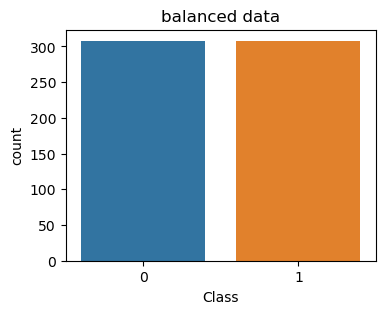

In [26]:
rus = RandomUnderSampler()
# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(pd.Series(y_rus).value_counts())
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x=y_rus)
ax.set_title('balanced data')
plt.show()


# Machine Learning Model

In [27]:

#since it is a binary problem,we will use the logistic regression to check if the transactions can be labeled as legal or scam.


In [28]:
# setup the machine learning model:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_rus, y_rus)


LogisticRegression()

In [29]:
# model predictions:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)



In [30]:
# classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))


Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.970     0.985     63130
           1      0.042     0.903     0.081        93

    accuracy                          0.970     63223
   macro avg      0.521     0.937     0.533     63223
weighted avg      0.998     0.970     0.983     63223

